# Convolutional Neural Networks

## Preliminaries

In this practical session you will implement and train several Convolutional Neural Networks (CNNs) using the Keras framework with a Tensorflow backend. If you are not already familiar with Keras, you can go over the [following tutorial](https://github.com/tueimage/essential-skills/blob/master/keras.md). More detailed information on the different functionalities can be found in the [Keras library documentation](https://keras.io/). 

Note that for this set of exercise CPU-only Tensorflow, which you should already have installed, is sufficient (i.e. GPU-support is not required but it will make your experiments run faster). 

You are also required to use the `gryds` package for data augmentation that you can install directly from git: `pip install git+https://github.com/tueimage/gryds/`.

You also have to install the Keras deep learning framework (if you have not done so already) by running `conda install keras`. Note that there are two implementations of Keras, one from https://keras.io/ and another one that ships with Tensorflow. Here we use the former. 

## MNIST
We will first train a simple CNN to classify handwritten digits using the MNIST dataset. This dataset is often referred to as the "Hello world!" example of deep learning because it can be used to quickly illustrate a small neural network in action (and obtain a decent classification accuracy in the process). More information on it can be found [here](http://yann.lecun.com/exdb/mnist/).

First, let's load the dataset and visualize some images.

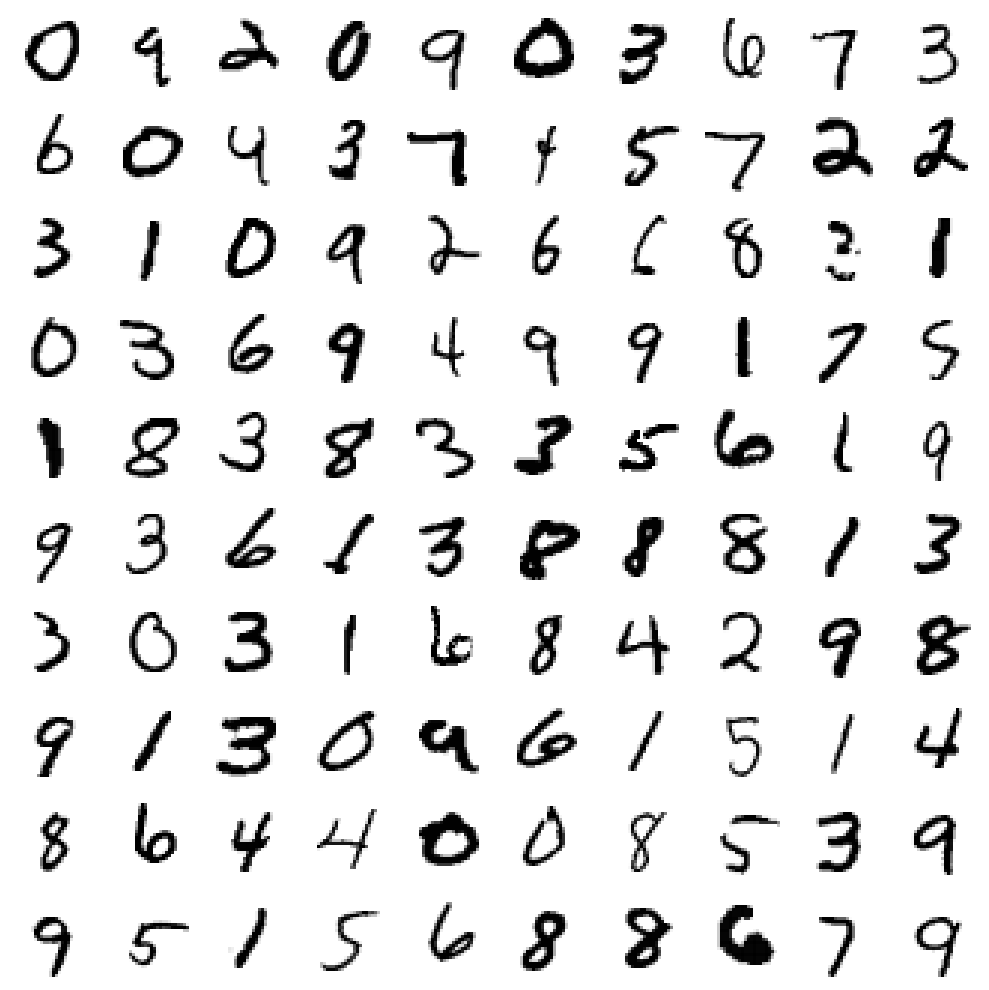

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

# load the MNIST the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scale the image intensities to the 0-1 range
x_train = (x_train / 255.0).astype(np.float32)
x_test = (x_test / 255.0).astype(np.float32)

# convert the data to channel-last
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# convert the labels to one-hot encoded
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

def plot_images(images, dim=(10, 10), figsize=(10, 10), title=''):
    
    plt.figure(figsize=figsize)
    
    for i in range(images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    
    plt.tight_layout()
    plt.suptitle(title)
    plt.show()
    
plot_images(x_train[np.random.randint(0, x_train.shape[0], size=100)].reshape(100, 28, 28))

The MNIST classification task is quite simple: given an image, predict the digit that it contains. Thus, this is a 10-class classification problem.

Let's define a simple network for the handwritten digit classification.

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

c:\Users\20182717\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Compile and train the network (note that this could take a while).

In [4]:
import keras
from keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
 89/469 ━━━━━━━━━━━━━━━━━━━━ 58s 153ms/step - accuracy: 0.6434 - loss: 1.0633

KeyboardInterrupt: 

Now that the model is trained, we can evaluate its performance on the independent test dataset.

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.03264705464243889
Test accuracy: 0.9918000102043152


## U-Net
The U-Net convolutional neural network architecture was first developed for biomedical image segmentation and is to this day one of the most widely used methods for image segmentation. The details of the architecture can be found in the [original paper](https://arxiv.org/abs/1505.04597). In this practical we will build and train a U-Net network that is able to segment blood vessels in retinal images. 

### Loading and visualizing the data
The data for this task is taken from the [DRIVE](https://www.isi.uu.nl/Research/Databases/DRIVE/index.php) database. It consists of photographs of the retina, where the goal is to segment the blood vessels within. The dataset has a total of 40 photographs, divided in 20 images for training and 20 for testing. The images corresponding to the DRIVE test set can be found [here](https://www.dropbox.com/s/zk51wgupimw7jd9/DRIVE.zip?dl=0).

Let's load the training set and visualize an image with the corresponding blood vessel segmentation. For training we will divide the data in a training and a validation set to monitor the model during training.

['./data/DRIVE/training/images\\21_training.tif', './data/DRIVE/training/images\\22_training.tif', './data/DRIVE/training/images\\23_training.tif', './data/DRIVE/training/images\\24_training.tif', './data/DRIVE/training/images\\25_training.tif', './data/DRIVE/training/images\\26_training.tif', './data/DRIVE/training/images\\27_training.tif', './data/DRIVE/training/images\\28_training.tif', './data/DRIVE/training/images\\29_training.tif', './data/DRIVE/training/images\\30_training.tif', './data/DRIVE/training/images\\31_training.tif', './data/DRIVE/training/images\\32_training.tif', './data/DRIVE/training/images\\33_training.tif', './data/DRIVE/training/images\\34_training.tif', './data/DRIVE/training/images\\35_training.tif', './data/DRIVE/training/images\\36_training.tif', './data/DRIVE/training/images\\37_training.tif', './data/DRIVE/training/images\\38_training.tif', './data/DRIVE/training/images\\39_training.tif', './data/DRIVE/training/images\\40_training.tif']
(20, 584, 565, 3)


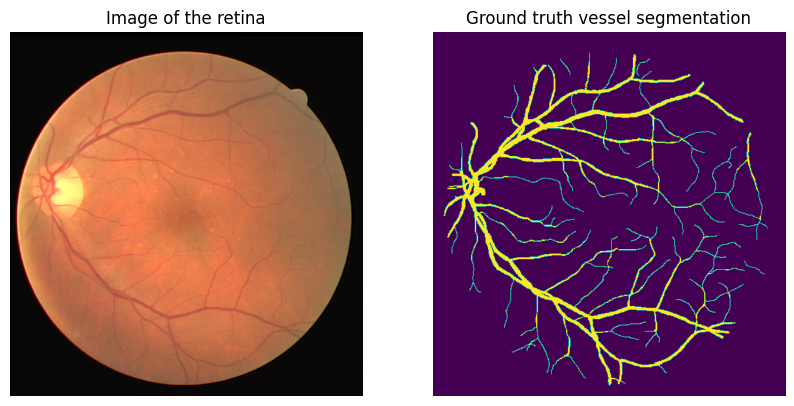

(16, 584, 565, 3)
(16, 584, 565, 1)
(16, 584, 565, 1)
(4, 584, 565, 3)
(4, 584, 565, 1)
(4, 584, 565, 1)


In [5]:
%matplotlib inline
import sys
sys.path.append('code/')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from glob import glob
from unet_utils import load_data

# location of the DRIVE dataset
data_folder = './data/DRIVE/'
train_paths = glob(data_folder + 'training/images/*.tif')
print(train_paths)
images, masks, segmentations = load_data(train_paths)

# print the shape of image dataset
print(images.shape)

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(images[0])

plt.subplot(1, 2, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(segmentations[0][:, :, 0])

plt.show()

# divide in training and validation
train_images, val_images, train_masks, val_masks, train_segmentations, val_segmentations = train_test_split(
    images, masks, segmentations, test_size=0.2, random_state=7)

# print the shape of the training and valudation datasets
print(train_images.shape)
print(train_masks.shape)
print(train_segmentations.shape)
print(val_images.shape)
print(val_masks.shape)
print(val_segmentations.shape)

### Training a U-Net model

You are already provided with implementation of the U-Net architecture in `unet_model.py`. This is a modular implementation and can be used to generate U-Net architectures with a variety of hyperparameters such as depth and number of feature maps. Before using the model, examine the code and documentation and make sure that you understand all the details.

We will train a U-Net model using smaller patches extracted from the training images. Training the images on smaller patches requires less computation power and results in a more varied training dataset (it has the effect of data augmentation by image translation). Because a U-Net is a fully convolutional network it can be evaluated on inputs of different size (the output size will change according to the input size). Thus, although the model will be trained on smaller patches it can still be used to segment larger images with one pass through the model. 


(16, 32, 32, 3)


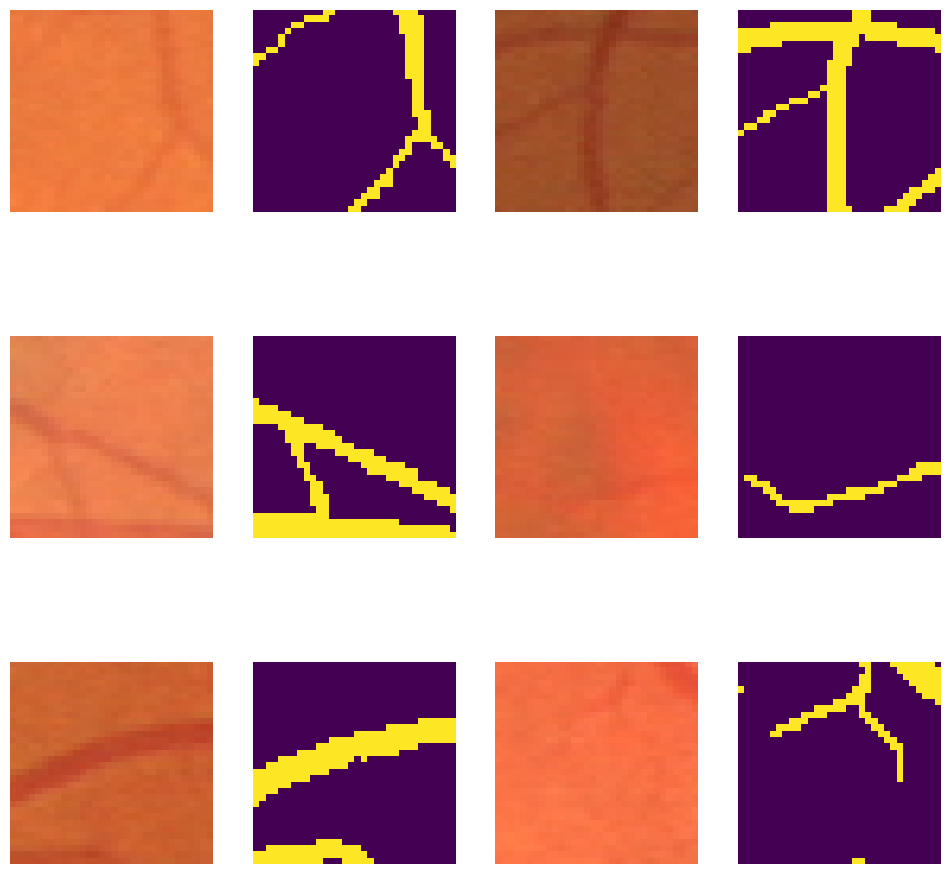

In [6]:
from unet_utils import extract_patches, preprocessing

# work with 32x32 patches
patch_size = (32, 32)

# 200 patches per image
patches_per_im = 200

# visualize a couple of patches as a visual check
patches, patches_segmentations = extract_patches(train_images, train_segmentations, patch_size, patches_per_im=1, seed=7)

print(patches.shape)

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 12))

for i in range(0, 3):
    axes[i, 0].axis('off')
    axes[i, 0].imshow(patches[i])
    axes[i, 1].axis('off')
    axes[i, 1].imshow(patches_segmentations[i][:, :, 0])
    axes[i, 2].axis('off')
    axes[i, 2].imshow(patches[i+5])
    axes[i, 3].axis('off')
    axes[i, 3].imshow(patches_segmentations[i+5][:, :, 0])

plt.show()

In [7]:
# pad the validation data to fit the U-Net model
# images of shape (584, 565) shape result in concatenation error due to the odd number of columns

print("Old shape:", val_images.shape)

val_images, val_masks, val_segmentations = preprocessing(
    val_images, 
    val_masks, 
    val_segmentations, 
    desired_shape=(584, 584))
    
print("New shape:", val_images.shape)

Old shape: (4, 584, 565, 3)
New shape: (4, 584, 584, 3)


In [9]:
# Estimated runtime is ~30 min

import os
from unet_model import unet
from unet_utils import datagenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(train_images[0], axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history = model.fit_generator(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 111s - 2s/step - accuracy: 0.7704 - loss: 0.5599 - val_accuracy: 0.1332 - val_loss: 0.8246
Epoch 2/250
50/50 - 46s - 926ms/step - accuracy: 0.9391 - loss: 0.3237 - val_accuracy: 0.9211 - val_loss: 0.3823
Epoch 3/250
50/50 - 45s - 902ms/step - accuracy: 0.9527 - loss: 0.2377 - val_accuracy: 0.1055 - val_loss: 2.9104
Epoch 4/250
50/50 - 46s - 914ms/step - accuracy: 0.9568 - loss: 0.1958 - val_accuracy: 0.9211 - val_loss: 0.2656
Epoch 5/250
50/50 - 45s - 898ms/step - accuracy: 0.9578 - loss: 0.1682 - val_accuracy: 0.9211 - val_loss: 0.2590
Epoch 6/250
50/50 - 46s - 910ms/step - accuracy: 0.9612 - loss: 0.1466 - val_accuracy: 0.9211 - val_loss: 0.2940
Epoch 7/250
50/50 - 46s - 916ms/step - accuracy: 0.9618 - loss: 0.1321 - val_accuracy: 0.9217 - val_loss: 0.2334
Epoch 8/250
50/50 - 44s - 877ms/step - accuracy: 0.9624 - loss: 0.1231 - val_accuracy: 0.9217 - val_loss: 0.3073
Epoch 9/250
50/50 - 45s - 905ms/step - accuracy: 0.9640 - loss: 

### Visualizing the segmentation results

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


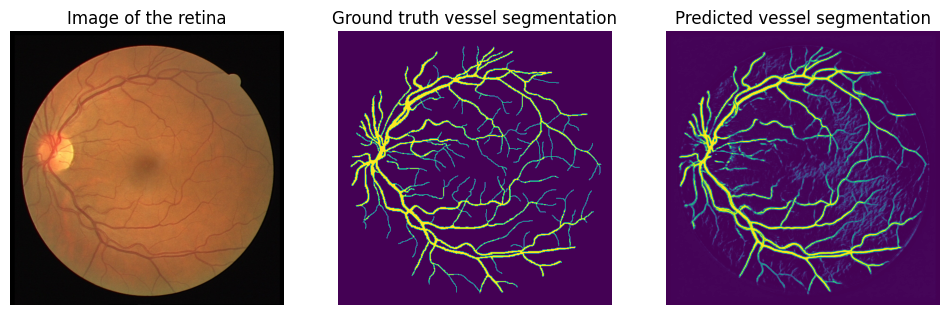

In [10]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina")
plt.axis('off')
plt.imshow(test_images[0])

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

# Exercises

## Number of parameters

The first convolutional layer in the MNIST example has 320 parameters. The first fully connected layer has 1179,776 parameters. What do these parameters correspond to? 

<font color='#770a0a'>What is the general expression for the number of parameters of 1) a convolutional layer and 2) a fully-connected layer?</font>

Answer:

Each parameter in a neural network is either a weight or a bias in one of the layers, these are used to parameterize a problem and represent the dependencies between layers and the strenght of their connections. 

Convolutional layer: $((h*w*d)+1) * k$ 
Here h and w are height and width, d is the number of input channels. We add 1 for the bias and finally multiply with k number of output channels or filters. 

Fully-connected layer: $ (nr\_in * nr\_out) + bias$
Here nr_in are number of input from previous layer, nr_out is the output size for the current layer. bias is the number of bias channels one for each output neuron. 

## Fully-convolutional MNIST model

Modify the model in the MNIST example in such a way that it only contains convolutional layers while keeping the same number of parameters. If you do the modification correctly, the two models will have the same behaviour (i.e. they will represent the same model, only with different implementation). Show this experimentally. 

Answer:

In order to do this we must remove the dense layers and implement some Convolution 2D layers to mimic their behavior. With the added restriction of keeping the same number of parameters we are left with the option of doing a 1 by 1 kernel and a filter size of the original size of the dense layer. The first dense layer with 128 size is replaced by a filter size 128 kernel size 1 by 1 with activation relu adn the second dense layer is replaced with a filter size 10 (for classification) and kernel size 1 by 1 and softmax activation for classification.

In [ ]:
# Full MNIST example with removed layers for non-parameterized layers

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# We remove the dense layers and input conv2 layers
model.add(Conv2D(128, (1,1), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(10, (1,1), activation='softmax'))

model.summary()

model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])



## U-Net architecture

<font color='#770a0a'> What is the role of the skip connections in the U-Net neural network architecture? Will it be possible to train the exact same architecture with the skip connections omitted? If yes, what would be the expected result? If no, what would be the cause of the error?</font>

Answer:

Usually skip connections are used to help models which are impacted by the vanishing gradient problem or the degradation problem. 

The vanishing gradient problem happens when the loss that is propagated backwards gets smaller and smaller and in the end only influences the earlier layers in a non-significant way. Skip-connections help with a more direct flow the the gradient as it now bypasses some layer(s) and the information passed back through the skip connection does not get smaller due to an activation function. 

The degradation problem is that when we add a larger amount of layers then the model migh struggle to properly propagate information and having skip connections in a sense re-iterates information from the previous layer in a sense reminding the model how the data looked like. 

Yes it is possible to train the exact same architecture with skip connections ommitted, this would result in a decoder-encoder system with no retention of spatial information though.
Performance will be worse very likely due to having a loss of spatial information and the passing of data through a bottleneck without parameterizing the latent space (such as in a VAE).


## Data augmentation

<font color='#770a0a'>Why does data augmentation result in less overfitting? Can data augmentation be applied to the test samples? If yes, towards what goal? If no, what is preventing that?</font>


Implement random brightness augmentation of the image data by adding a random offset to the image intensity before passing them trough the network at training time. Train a model with random brightness augmentation and compare it to the baseline above. 

Implement data augmentation procedure that in addition to brightness augmentation also performs b-spline geometric augmentation using the [`gryds`](https://github.com/tueimage/gryds) package (you can look at the documentation of the package for an example on how to do that). Compare the new model with the baseline and the model that only performs brightness augmentation.



Answer:

Data augmentation allows for a larger set of data to train on, when using a smaller dataset. A larger training set decreases the chance of overfitting and increases generalization. Due to augmenting the data the model gets used to a large variety of scenarios, this helps the model learn generalized patterns instead of overfitting to specific memorized patterns.

Yes data augmentation can be applied to the test data, this can be done to test if the model can also deal with certain extremities that are not present in the original test set.


#### Random brightness implementation:

In [72]:
# random brightness augmentation
from keras.layers import RandomBrightness

random_brightness = RandomBrightness(factor=0.001, seed=4)
image_rb = random_brightness(train_images[0], training=True)

# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(image_rb, axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model_rb = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model_rb.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history_rb = model_rb.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])


(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 103s - 2s/step - accuracy: 0.8000 - loss: 0.5302 - val_accuracy: 0.9211 - val_loss: 0.4582
Epoch 2/250
50/50 - 49s - 970ms/step - accuracy: 0.9461 - loss: 0.3245 - val_accuracy: 0.9161 - val_loss: 0.3867
Epoch 3/250
50/50 - 42s - 849ms/step - accuracy: 0.9565 - loss: 0.2295 - val_accuracy: 0.9211 - val_loss: 0.4636
Epoch 4/250
50/50 - 45s - 892ms/step - accuracy: 0.9575 - loss: 0.1857 - val_accuracy: 0.9222 - val_loss: 0.2869
Epoch 5/250
50/50 - 45s - 900ms/step - accuracy: 0.9561 - loss: 0.1694 - val_accuracy: 0.9160 - val_loss: 0.2762
Epoch 6/250
50/50 - 44s - 889ms/step - accuracy: 0.9606 - loss: 0.1412 - val_accuracy: 0.9239 - val_loss: 0.2740
Epoch 7/250
50/50 - 44s - 884ms/step - accuracy: 0.9631 - loss: 0.1222 - val_accuracy: 0.9229 - val_loss: 0.3181
Epoch 8/250
50/50 - 43s - 858ms/step - accuracy: 0.9618 - loss: 0.1200 - val_accuracy: 0.9318 - val_loss: 0.2134
Epoch 9/250
50/50 - 44s - 887ms/step - accuracy: 0.9654 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


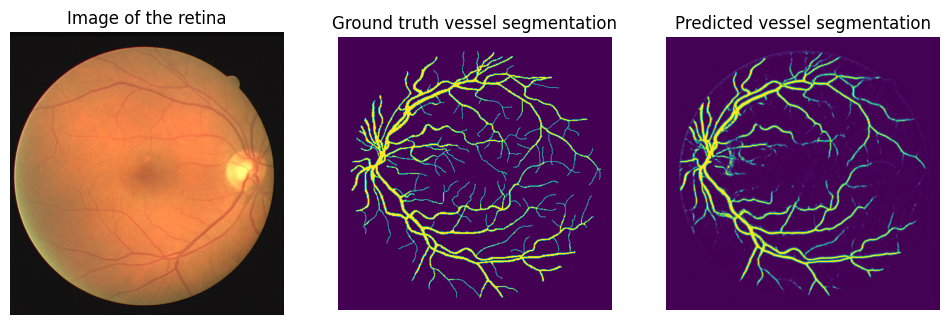

In [73]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Image of the retina (random brightness)")
plt.axis('off')
plt.imshow(image_rb)

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

Result:

The major vessels have been mostly correctly segmented. The smaller ofshoots however, are not picked up (likely because the image is brighter). Compared to the baseline U-net segmentation there is less 'fuzzyness' around vessel ends. So this approach could be useful if the desired outcome should have less fuzzyness and only the major vessels are of interest.

#### Random brightness + bspline augmentation

In [150]:
# random brightness augmentation + bspline augmentation
import gryds

random_brightness = RandomBrightness(factor=0.001, seed=4)
image_rb = random_brightness(train_images[0], training=True)

# Define random grid
np.random.seed(2)
random_grid = np.random.rand(3, 2, 2, 2)
random_grid -= 0.5
random_grid /= 10

# Define a B-spline transformation object
bspline = gryds.BSplineTransformation(random_grid)

# Define an interpolator object for the image:
interpolator = gryds.Interpolator(image_rb)

# Transform the image using bspline transformation
image_rb_bspline = interpolator.transform(bspline)


# use a single training image, to better demonstrate the effects of data augmentation
X_train, y_train = np.expand_dims(image_rb_bspline, axis=0), np.expand_dims(train_segmentations[0], axis=0)

print(X_train.shape)
print(y_train.shape)

# hyperparameters
depth = 3
channels = 32
use_batchnorm = True
batch_size = 64
epochs = 250
steps_per_epoch = int(np.ceil((patches_per_im * len(train_images)) / batch_size))

# work with 32x32 patches
patch_size = (32, 32)
# 200 patches per image
patches_per_im = 200

# initialize model
model_rb_bspline = unet(input_shape=(None, None, 3), depth=depth, channels=channels, batchnorm=use_batchnorm)

# print a summary of the model
# model.summary(line_length=120)

# compile the model
model_rb_bspline.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# stop the training if the validation loss does not increase for 15 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# train the model with the data generator, and save the training history
history_rb_bspline = model_rb_bspline.fit(datagenerator(X_train, y_train, patch_size, patches_per_im, batch_size),
                              validation_data=(val_images, val_segmentations),
                              steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=2,
                              callbacks=[early_stopping])

(1, 584, 565, 3)
(1, 584, 565, 1)
Epoch 1/250
50/50 - 149s - 3s/step - accuracy: 0.7191 - loss: 0.6242 - val_accuracy: 0.9211 - val_loss: 0.5495
Epoch 2/250
50/50 - 62s - 1s/step - accuracy: 0.8996 - loss: 0.4546 - val_accuracy: 0.9211 - val_loss: 0.3765
Epoch 3/250
50/50 - 63s - 1s/step - accuracy: 0.9213 - loss: 0.3383 - val_accuracy: 0.9211 - val_loss: 0.3030
Epoch 4/250
50/50 - 61s - 1s/step - accuracy: 0.9247 - loss: 0.2686 - val_accuracy: 0.9211 - val_loss: 0.2969
Epoch 5/250
50/50 - 61s - 1s/step - accuracy: 0.9257 - loss: 0.2380 - val_accuracy: 0.9206 - val_loss: 0.2832
Epoch 6/250
50/50 - 63s - 1s/step - accuracy: 0.9332 - loss: 0.2116 - val_accuracy: 0.9188 - val_loss: 0.3195
Epoch 7/250
50/50 - 64s - 1s/step - accuracy: 0.9313 - loss: 0.2074 - val_accuracy: 0.9192 - val_loss: 0.2811
Epoch 8/250
50/50 - 62s - 1s/step - accuracy: 0.9344 - loss: 0.1970 - val_accuracy: 0.9172 - val_loss: 0.3026
Epoch 9/250
50/50 - 63s - 1s/step - accuracy: 0.9359 - loss: 0.1917 - val_accuracy: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


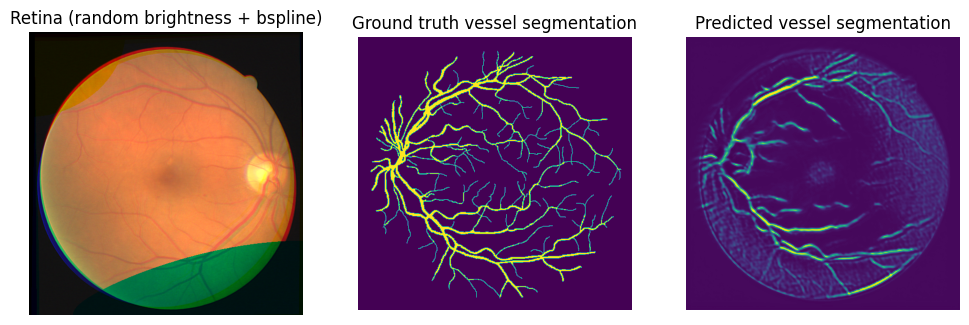

In [152]:
# run the model on one test image and show the results
from unet_utils import preprocessing

# test data paths
impaths_test = glob(data_folder + 'test/images/*.tif')

# load data
test_images, test_masks, test_segmentations = load_data(impaths_test, test=True)

# pad the data to fit the U-Net model
test_images, test_masks, test_segmentations = preprocessing(test_images, test_masks, test_segmentations, 
                                                            desired_shape=(584, 584))

# use a single image to evaluate
X_test, y_test = np.expand_dims(test_images[0], axis=0), np.expand_dims(test_masks[0], axis=0)

# predict test samples
test_prediction = model_rb_bspline.predict(X_test, batch_size=4)

# visualize the test result
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.title("Retina (random brightness + bspline)")
plt.axis('off')
plt.imshow(image_rb_bspline)

plt.subplot(1, 3, 2)
plt.title("Ground truth vessel segmentation")
plt.axis('off')
plt.imshow(test_segmentations[0][:, :, 0])

plt.subplot(1, 3, 3)
plt.title("Predicted vessel segmentation")
plt.axis('off')
plt.imshow(test_prediction[0, :, :, 0])

plt.show()

Result:

This result appears to show that these specific augmentations (with these settings) together, make it harder for the model to correctly segment the vessels. It does appear that because of the bspline augmentation the model has picked up on very tiny ofshoots of the vessels, but seeing as they are not apparent in the groind truth image, those could be artefacts of the bspline transformation. In conclusion, only random brightness gave a better result than both, and no augmentation gave a better result than either.
